### Unit 4: Exercise 3 (Hypothesis Testing) Solutions

**Reading for this exercise**     

- *OI Biostat*: Sections 4.3, 4.4


The previous exercises in Unit 4 discussed how to calculate point estimates and interval estimates for a population mean ($\mu$) from a sample. In the simulation of repeated sampling from a population with the \texttt{yrbss} dataset, we have observed that in most cases, estimates of $\mu$ calculated from samples are fairly accurate. However, it is possible that by random chance, a sample results in an interval estimate that does not contain $\mu$.

What is the likelihood of observing a particular sample mean $\overline{x}$ if the population average is assumed to be $\mu$? **Hypothesis testing** is a method for calculating the probability of making a specific observation under a null hypothesis. At the end of this exercise, we will examine the relationship between hypothesis tests and confidence intervals.


*Exmple: Do American adults tend to be overweight?*

Body mass index (BMI) is an approximate scale used to estimate body fat that adjusts for both height and weight. According to the World Health Organization (WHO), the normal range for BMI is between 18.5 and 24.99. Individuals with BMI of 25 or greater are classified as overweight, while individuals with BMI of 30 or greater are classified as obese.

We will investigate this question using data from the National Health and Nutrition Examination Survey (NHANES), a survey conducted annually by the US Centers for Disease Control (CDC). The complete `NHANES` dataset contains 10,000 observations, which will be our artificial target population. BMI information is only available for survey participants that are age 21 or older.

There are two possible approaches: 

- Calculating a confidence interval for the population mean BMI ($\mu_{BMI}$)

- Conducting a formal hypothesis test 

Run the following code chunk to draw a random sample of size 200 from `NHANES` and select the individuals in the sample that are age 21 or older to be stored in `nhanes.samp.adult`. 

In [2]:
require(dplyr)
#load the dataset
require(NHANES)

#create sample
set.seed(5011)
nhanes.samp = sample_n(NHANES, size = 200)

#create sample of adults
nhanes.samp.adult = nhanes.samp %>%
    filter(Age >=21)
head(nhanes.samp.adult)

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
63147,2011_12,male,41,40-49,NA,White,White,Some College,Married,⋯,No,NA,Yes,Yes,15,50,1,No,Heterosexual,NA
57165,2009_10,male,48,40-49,586,Black,NA,High School,Married,⋯,Yes,17,No,Yes,17,81,10,No,Heterosexual,NA
69465,2011_12,female,50,50-59,NA,White,White,College Grad,Divorced,⋯,No,NA,No,Yes,17,4,1,No,Heterosexual,NA
57313,2009_10,female,74,70+,889,White,NA,College Grad,Widowed,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
56047,2009_10,female,27,20-29,329,White,NA,9 - 11th Grade,NeverMarried,⋯,Yes,16,No,Yes,13,10,3,No,Heterosexual,No
57056,2009_10,male,26,20-29,316,Mexican,NA,High School,NeverMarried,⋯,Yes,14,Yes,Yes,15,8,1,No,Heterosexual,NA


#### Problem 1:

a) Explore the distribution of BMI in `nhanes.samp.adult`. Using numerical and graphical summaries, describe the distribution of BMI in `nhanes.samp.adult`. From the data in the sample, does it seem like the population mean BMI will be outside the BMI range defined as normal (18.5 - 24.99)? 

b) Calculate a 95% confidence interval for BMI using `nhanes.samp.adult`. Does the interval suggest that the population average BMI is outside the normal range?

#### Solution:

a) The data are right-skewed, with one large outlier. The outlier corresponds to an implausibly extreme BMI value of 69.0; this value is excluded in the version of the analysis in Ch. 4 of `OI Biostat`, but included in this exercise for simplicity. The median BMI in the sample is 27.90, and 50% of the values are between 24 and 33. Yes; not only is the median at 27.9 above the upper limit of the normal range, 75% of the values are above 24.25, which is just within the normal range.  

In [3]:
summary(nhanes.samp.adult$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.10   24.25   27.90   29.10   33.46   69.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


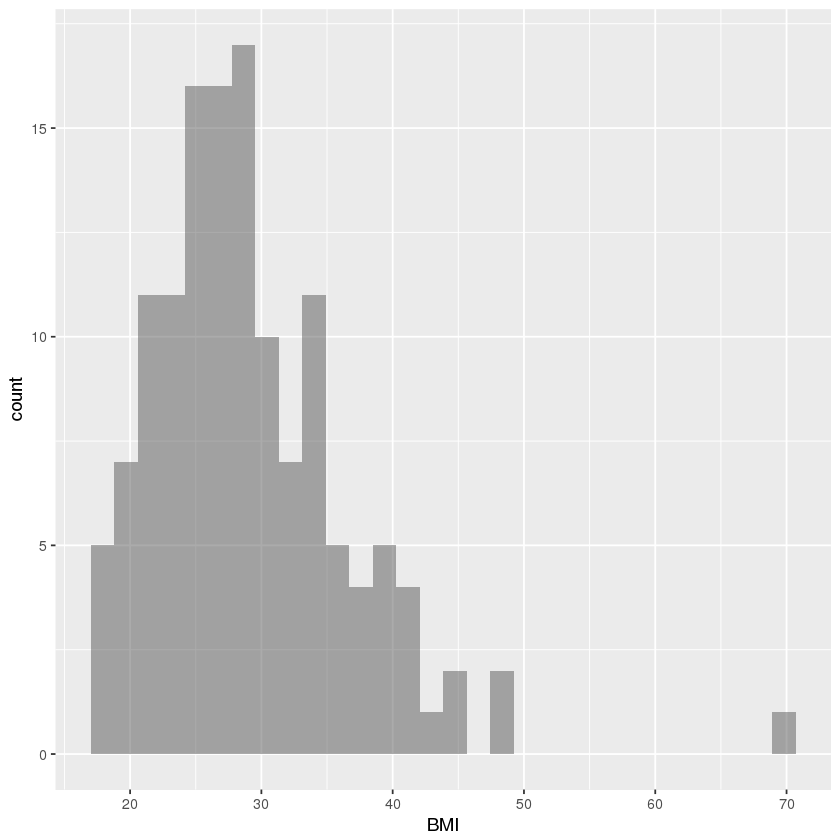

In [17]:
require(ggplot2)

ggplot(nhanes.samp.adult, aes(BMI)) +
    geom_histogram(alpha=0.5)

b) The interval of (27.81, 30.39) suggests that the population average BMI is outside the normal range. We are 95% confident that the population average BMI is between (27.81, 30.39), which is well above the defined range for normal BMI.

In [18]:
t.test(nhanes.samp.adult$BMI, conf.level = 0.95)$conf.int

[1] 27.81388 30.38524
attr(,"conf.level")
[1] 0.95

#### Problem 2:

Conduct a hypothesis test.

a) Formulate null and alternative hypotheses. The symbol $\mu$ denotes a population mean, while $\mu_0$ refers to the numeric value specified by the null hypothesis. 

b) Specify a significance level, $\alpha$.

c) Calculate the test statistic. 
    
  $$t = \dfrac{\overline{x} - \mu_0}{s/ \sqrt{n}} $$

d) Calculate the $p$-value.

e) Draw a conclusion.

#### Solution:

a) The null and alternative hypotheses distill the original question of interest into statements that can be tested. Let's choose 21.7, the midpoint of the normal range, as $\mu_0$ and test the null hypothesis that the mean BMI in the population equals 21.7 ($H_0: \mu_{BMI} = 21.7$).

It is reasonable to assume that if $H_0$ is not true, then the population average BMI would be larger than 21.7. Let $H_A: \mu_{BMI} > 21.7$.

b) The significance level $\alpha$ defines a 'rare' event. Typically, $\alpha = 0.05$. An $\alpha$ level of 0.05 means that an event occurring with probability lower than 5% will be considered sufficient evidence against the null hypothesis. For this test, let $\alpha = 0.05$. 

c) The test statistic is 
 $$t = \dfrac{\overline{x} - \mu_0}{s/ \sqrt{n}} = \dfrac{29.10 - 21.7}{7.55/\sqrt{135}} = 11.383$$
  


In [19]:
#use r as a calculator
x.bar = mean(nhanes.samp.adult$BMI)
mu.0 = 21.7
s = sd(nhanes.samp.adult$BMI)
n = length(nhanes.samp.adult$BMI)

t = (x.bar - mu.0)/(s/sqrt(n))
t

[1] 11.38311

d)  The $p$-value is extremely small; $P(T \geq 11.383) = 1.01 \times 10^{-21}$.
 

In [20]:
#calculate the p-value
pt(t, df = n - 1, lower.tail = FALSE)

#alternatively, use t.test to calculate the t-stat and p-value
t.test(nhanes.samp.adult$BMI, mu = 21.7, alternative = "greater")

[1] 1.006759e-21


	One Sample t-test

data:  nhanes.samp.adult$BMI
t = 11.383, df = 134, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 21.7
95 percent confidence interval:
 28.02288      Inf
sample estimates:
mean of x 
 29.09956 


e)   The $p$-value is less than $\alpha$; the results are significant at $\alpha = 0.05$. There is sufficient evidence to reject the null hypothesis and accept the alternative that mean BMI in the `NHANES` "population" is greater than 21.7. The chance of drawing a sample with mean BMI 29.10 if the distribution were actually centered at 21.7 is almost zero!

#### Problem 3:

Is mean body temperature really 98.6 F? Conduct a hypothesis test to evaluate this claim using data from 130 healthy volunteers who participated in a vaccine study. The data are in the file `body_temperatures.Rdata` (see code below for loading data).

a) Choose whether to conduct a one-sided or two-sided test. Formulate null and alternative hypotheses.

b) Specify a significance level, $\alpha$.

c) Calculate the test statistic.
 
d) Calculate the $p$-value.

e) Confirm your calculations in parts c) and d) using `t.test()`.

f) Draw a conclusion.


In [21]:
load("body_temperatures.Rdata")

#### Solution:

a) Conduct a two-sided test in order to assess whether there is a difference in either direction; $H_0: \mu = 98.6$, $H_A: \mu \neq 98.6$.

b) Let $\alpha = 0.05$.

c) The test statistic is -5.45.

In [22]:
#load the dataset
load("body_temperatures.Rdata")

#use r as a calculator
x.bar = mean(body.temperatures)
mu.0 = 98.6
s = sd(body.temperatures)
n = length(body.temperatures)

t = (x.bar - mu.0)/(s/sqrt(n))
t

[1] -5.454823

d) For a two-sided hypothesis test, the $p$-value is the total area from both tails of the $t$ distribution that are beyond the absolute value of the observed $t$-statistic. Here, $2 \times P(T \leq -5.45) = 2.41 \times 10^{-7}$.


In [23]:
2*pt(t, df = n - 1)

[1] 2.410632e-07

In [25]:
t.test(body.temperatures, mu = 98.6, alternative = "two.sided")


	One Sample t-test

data:  body.temperatures
t = -5.4548, df = 129, p-value = 2.411e-07
alternative hypothesis: true mean is not equal to 98.6
95 percent confidence interval:
 98.12200 98.37646
sample estimates:
mean of x 
 98.24923 


f) The $p$-value of $2.41 \times 10^{-7}$ is less than $\alpha$; there is sufficient evidence to reject the null hypothesis and conclude that population mean body temperature is not equal to 98.6 F. since the sample mean is lower than 98.6, the data suggests that population mean body temperature is lower than 98.6 F. 

However, it is important to note that the 95% confidence interval is (98.12, 98.37) F. While the results may be statistically significant, the observed data do not exhibit a difference from 98.6 that would be considered biologically "significant" or interesting. It is known that body temperature varies by as much as 1 F throughout the day.